**<center><h1>SmolDocling-256M-preview : Testing its Performance in Documents, Tables, and Figures Understanding</h1></center>**

### **Table of Contents**

* [Install Libraries](#chapter1)
* [Import Libraries](#chapter2)
* [Load SmolDocling-256M-preview](#chapter3)
* [Extracting Text and Tables Using Docling](#chapter4)
    * [Full Conversion : Convert a page to docling](#section_1)
    * [Chart : Convert Chart into a Table](#section_2)
* [Conclusion](#chapter5)

## **1. Install Libraries**  <a class="anchor"  id="chapter1"></a>

In [2]:
%%capture
! pip install torch
! pip install docling_core
! pip install transformers
! pip install flash-attn --no-build-isolation

## **2. Import Libraries**  <a class="anchor"  id="chapter2"></a>

In [3]:
import torch
from docling_core.types.doc import DoclingDocument
from docling_core.types.doc.document import DocTagsDocument
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## **3. Load SmolDocling-256M-preview**  <a class="anchor"  id="chapter3"></a>

In [5]:
# Initialize processor and model
processor = AutoProcessor.from_pretrained("ds4sd/SmolDocling-256M-preview")
model = AutoModelForVision2Seq.from_pretrained(
    "ds4sd/SmolDocling-256M-preview",
    torch_dtype=torch.bfloat16,
    _attn_implementation="eager",
    #_attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager",
).to(DEVICE)

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [6]:
def parse_doc(image_path, input_query):
    # Load images
    image = load_image(image_path)
    
    # Create input messages
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": input_query}
            ]
        },
    ]

    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)
    
    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=8192)
    prompt_length = inputs.input_ids.shape[1]
    trimmed_generated_ids = generated_ids[:, prompt_length:]
    doctags = processor.batch_decode(
        trimmed_generated_ids,
        skip_special_tokens=False,
    )[0].lstrip()

    doctags_doc = DocTagsDocument.from_doctags_and_image_pairs([doctags], [image])

    # create a docling document
    doc = DoclingDocument(name="Document")
    doc.load_from_doctags(doctags_doc)

    # display the input image
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.axis("off")  
    plt.show()

    # display the output
    print(doc.export_to_markdown())

## **4. Extract Data**  <a class="anchor"  id="chapter4"></a>

### **Full Conversion : Convert a page to docling** <a class="anchor"  id="section_1"></a>

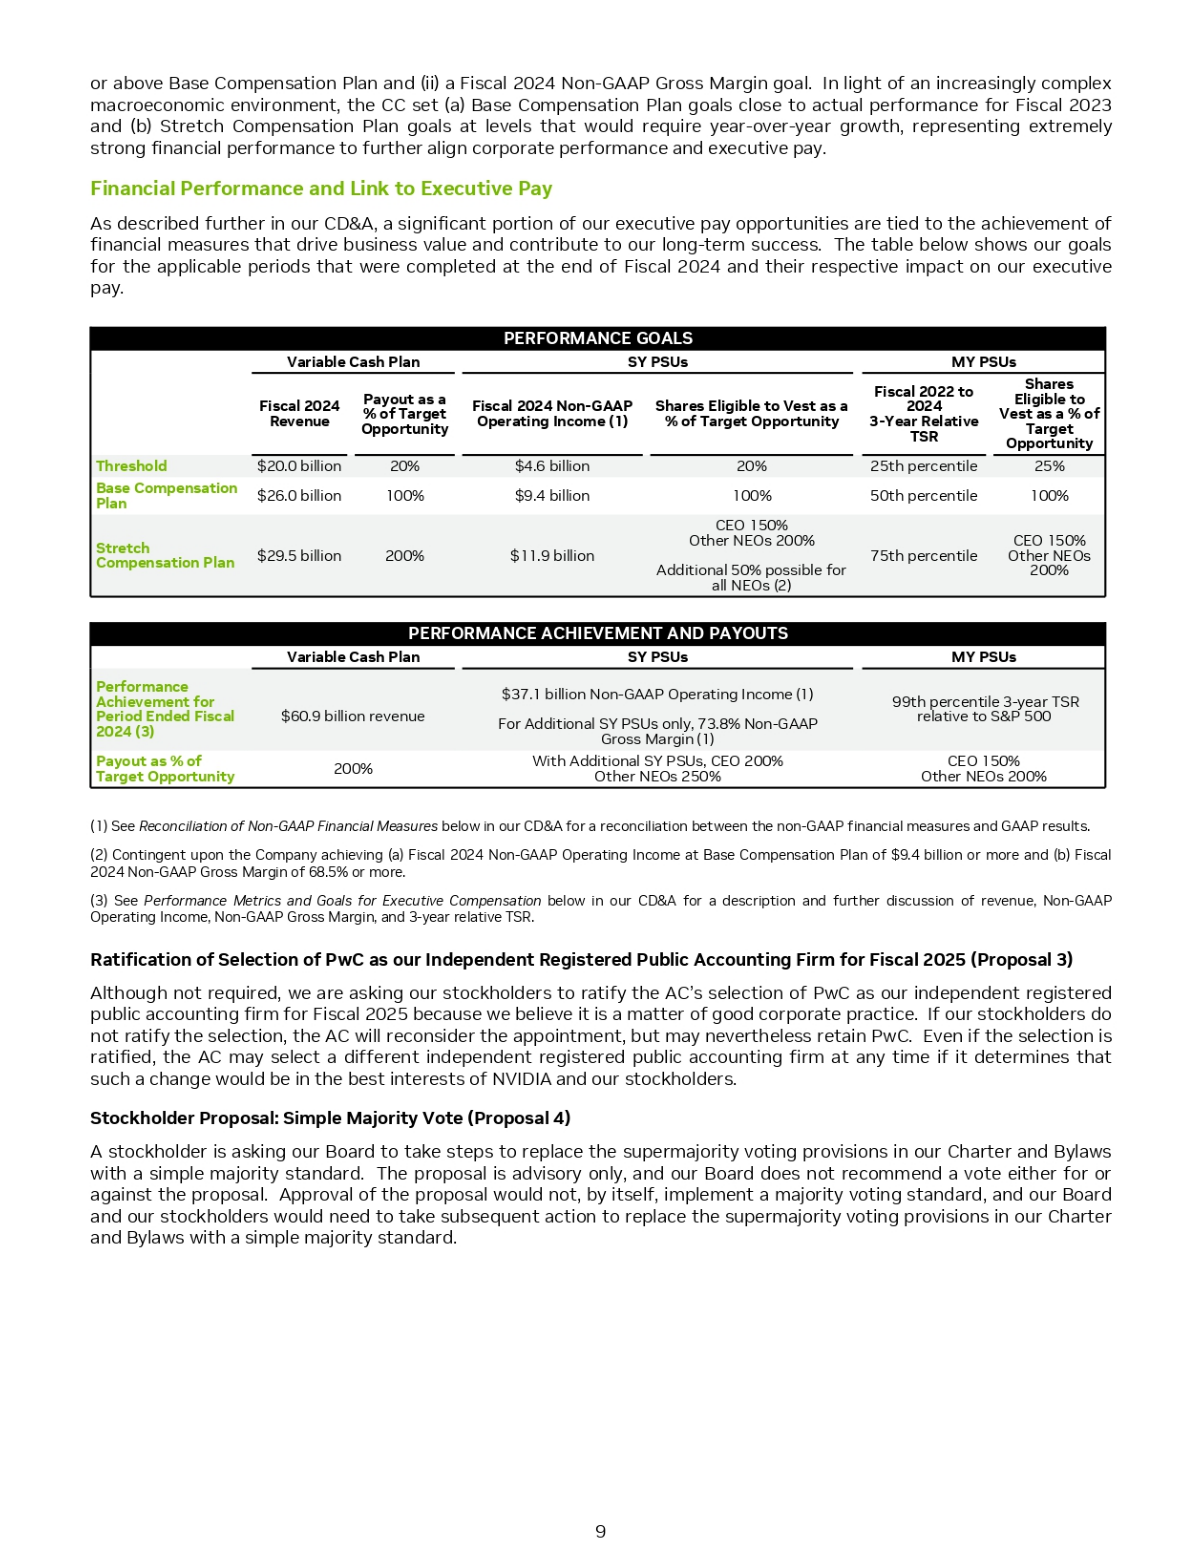

or above Base Compensation Plan and (ii) a Fiscal 2024 Non-GAAP Gross Margin goal. In light of an increasingly complex macroeconomic environment, the CC set (a) Base Compensation Plan goals close to actual performance for Fiscal 2023 and (b) Stretch Compensation Plan goals at levels that would require year-over-year growth, representing extremely strong financial performance to further align corporate performance and executive pay.

## Financial Performance and Link to Executive Pay

As described further in our CD&amp;A, a significant portion of our executive pay opportunities are tied to the achievement of financial measures that drive business value and contribute to our long-term success. The table below shows our goals for the applicable periods that were completed at the end of Fiscal 2024 and their respective impact on our executive pay.

PERFORMANCE ACHIEVEMENT AND PAYOUTS

|                                                   | PERFORMANCE GOALS                   | PERFORMANCE GO

In [8]:
parse_doc(
    "/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-2_page-0001.jpg",
    "Convert this page to docling."
)

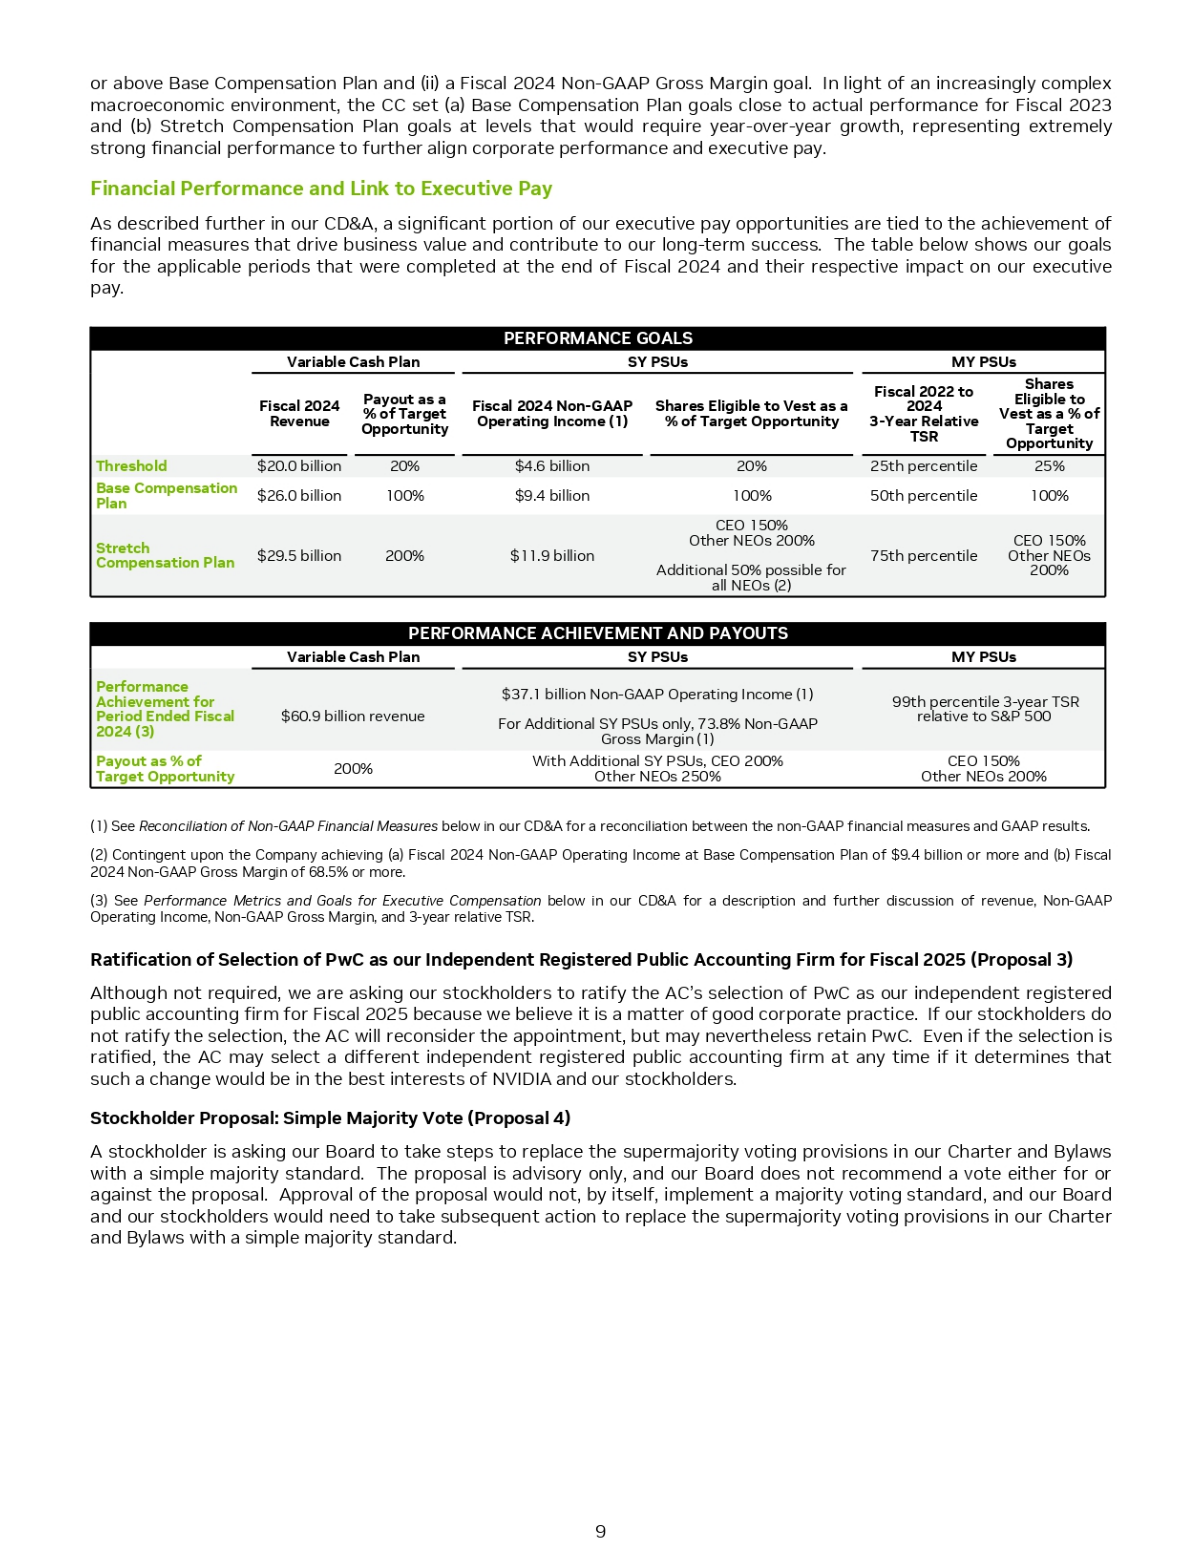

## Financial Performance and Link to Executive Pay

## PERFORMANCE ACHIEVEMENT AND PAYOUTS

## Ratification of Selection of PwC as the Independent Registered Public Accounting Firm for Fiscal 2025 (Proposal 3)

## Stockholder Proposal:  Simple Majority Vote (Proposal 4)


In [15]:
parse_doc(
    "/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-2_page-0001.jpg",
    "Find all 'text' elements on the page, retrieve all section headers."
)

it even extracts the headers correctly.

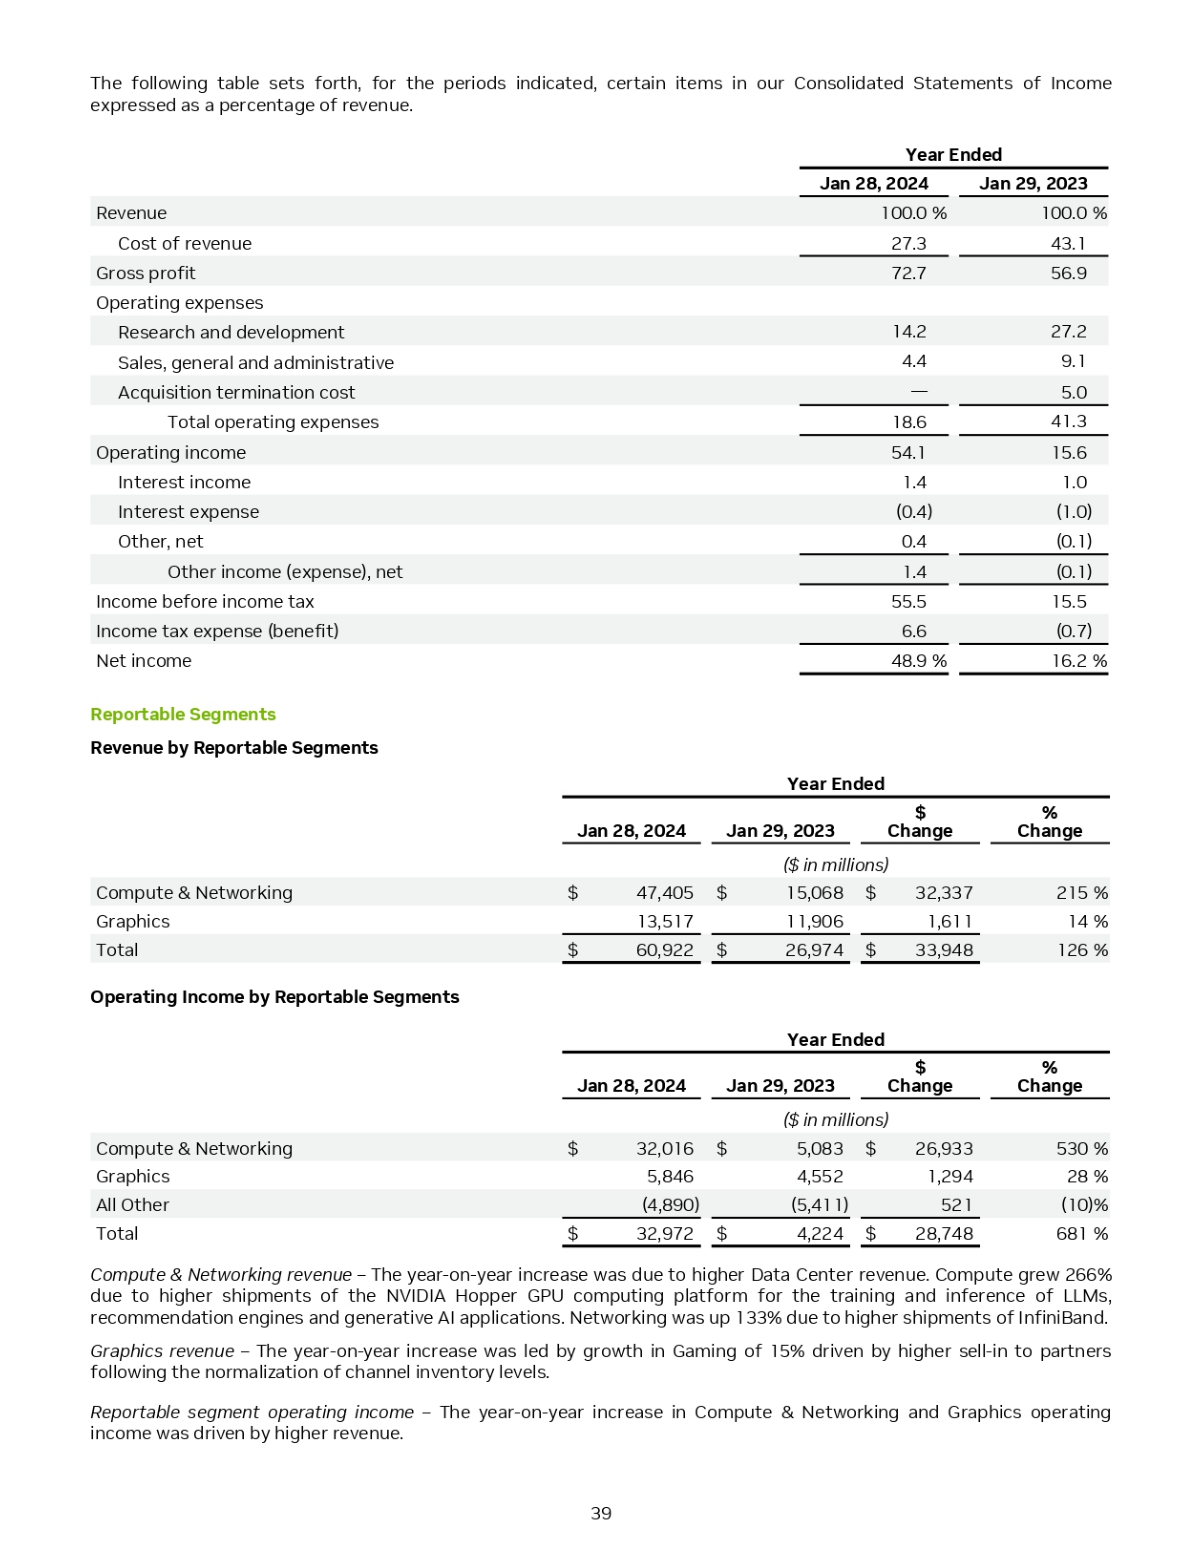

The following table sets forth, for the periods indicated, certain items in our Consolidated Statements of Income expressed as a percentage of revenue.

|                                   | Year Ended   | Year Ended   | Year Ended   |
|-----------------------------------|--------------|--------------|--------------|
| Revenue                           | Jan 28, 2024 | Jan 29, 2023 | Jan 29, 2023 |
|                                   | 100.0 %      | 100.0 %      |              |
| Cost of revenue                   | 27.3         | 43.1         |              |
| Gross profit                      | 72.7         | 56.9         |              |
| Operating expenses                |              |              |              |
| Research and development          | 14.2         | 27.2         |              |
| Sales, general and administrative | 4.4          | 9.1          |              |
| Acquisition termination cost      | -            | 5.0          |              |
| Total operating

In [9]:
parse_doc(
    "/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-9_page-0001.jpg",
    "Convert this page to docling."
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


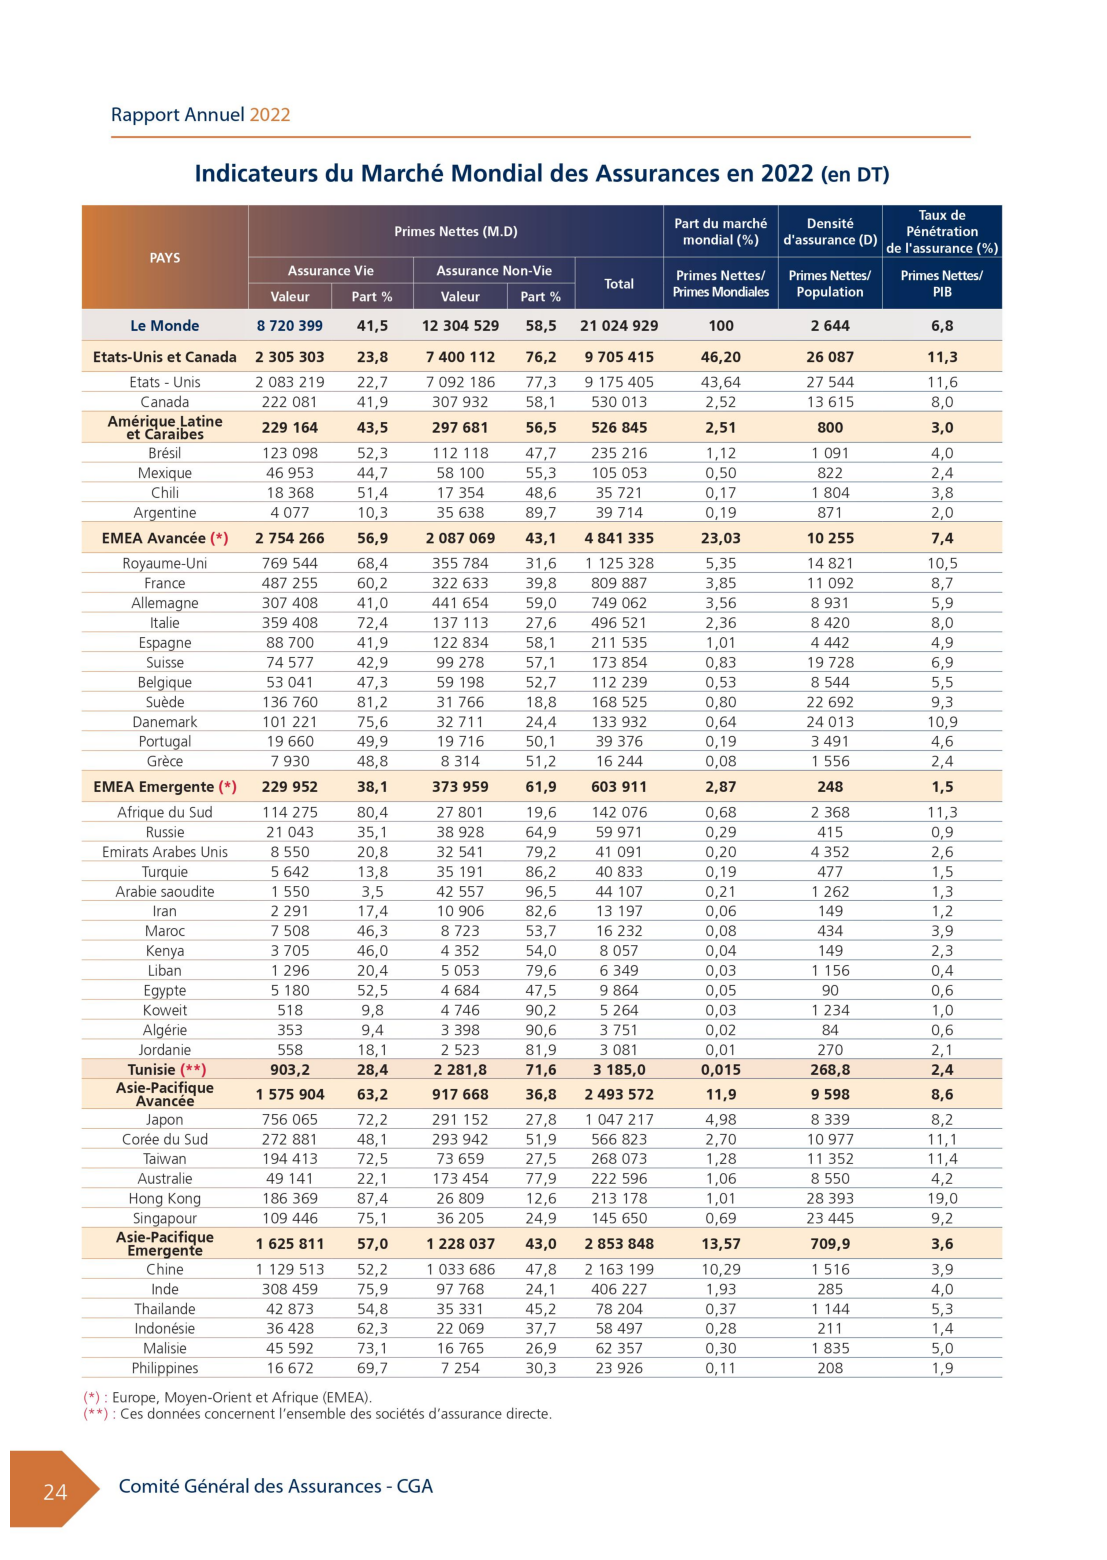

Rapport Annuel 2022

## Indicateurs du Marché Mondial des Assurances en 2022 (en DT)

| PAYS                     | Primes Nettes (M.D)   | Primes Nettes (M.D)   | Primes Nettes (M.D)   | Primes Nettes (M.D)   | Part du marché  mondial (%)   | Part de assurance (D)            | Part de assurance (D)      | Taux de  Pénétration  de l'assurance (%)   | Taux de  Pénétration  de l'assurance (%)   |
|--------------------------|-----------------------|-----------------------|-----------------------|-----------------------|-------------------------------|----------------------------------|----------------------------|--------------------------------------------|--------------------------------------------|
|                          | Assurance Vie         | Assurance Non-Vie     | Assurance Non-Vie     | Assurance Non-Vie     | Assurance Non-Vie             | Primes Nettes/  Primes Mondiales | Primes Nettes/  Population | Primes Nettes/  PIB                        | Primes Nettes/  PIB       

In [7]:
parse_doc(
    "/kaggle/input/different-tables-images-testing/other_table.jpg",
    "Convert this page to docling."
)

The model successfully extracted the table in a well-structured format, but it struggled with correctly positioning the headers, possibly due to the complexity of the table's header.

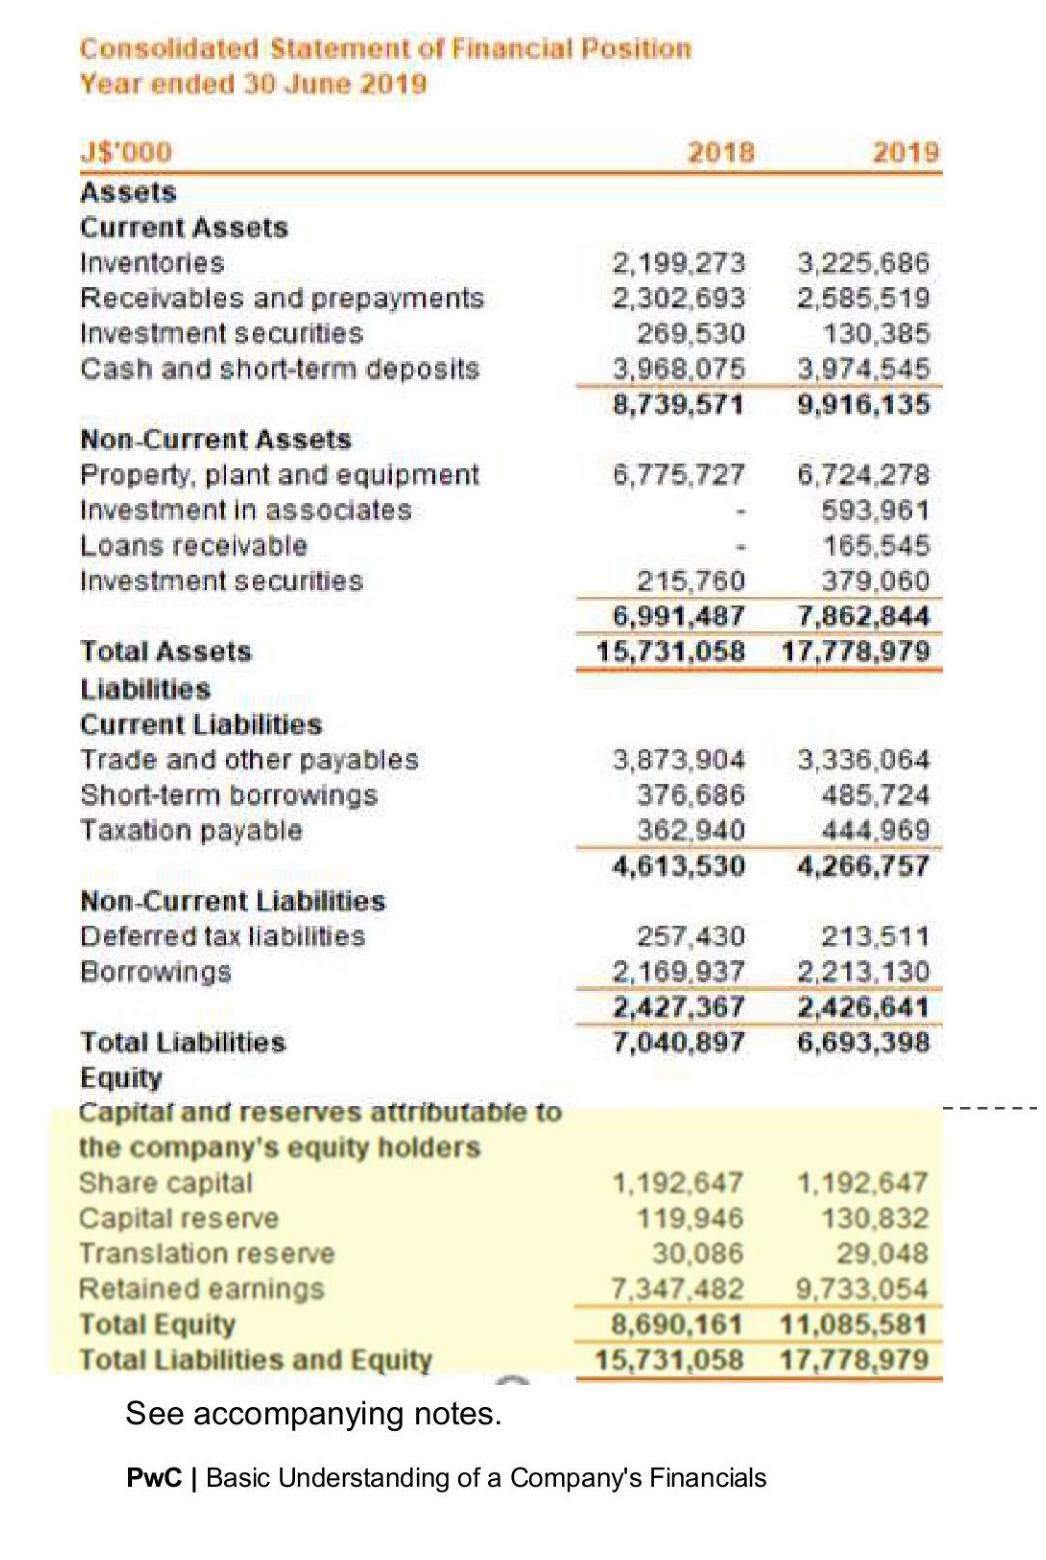

Consolidated Statement of Financial Position Year ended 30 June 2019

| 2018                                                              | 2019                  |
|-------------------------------------------------------------------|-----------------------|
| Assets                                                            | Assets                |
| Current Assets                                                    | Current Assets        |
| Inventories                                                       | 2,199,273 3,225,686   |
| Receivables and prepayments                                       | 2,302,693 2,585,519   |
| Investment securities                                             | 269,530 130,385       |
| Cash and short-term deposits                                      | 3,968,075 3,974,545   |
| Non-Current Assets                                                | 8,739,571 9,916,135   |
| Property, plant and equipment                                     | 6,775,727 6,72

In [10]:
parse_doc(
    "/kaggle/input/different-tables-images-testing/table_1.jpg",
    "Convert this page to docling."
)

Based on the extracted table above, the model struggles to correctly extract rows, even adding values to rows that were empty in the original image.

### **Chart : Convert Chart into a Table** <a class="anchor"  id="section_2"></a>

Below, you can see that Smoldocling failed to convert any chart into a table.

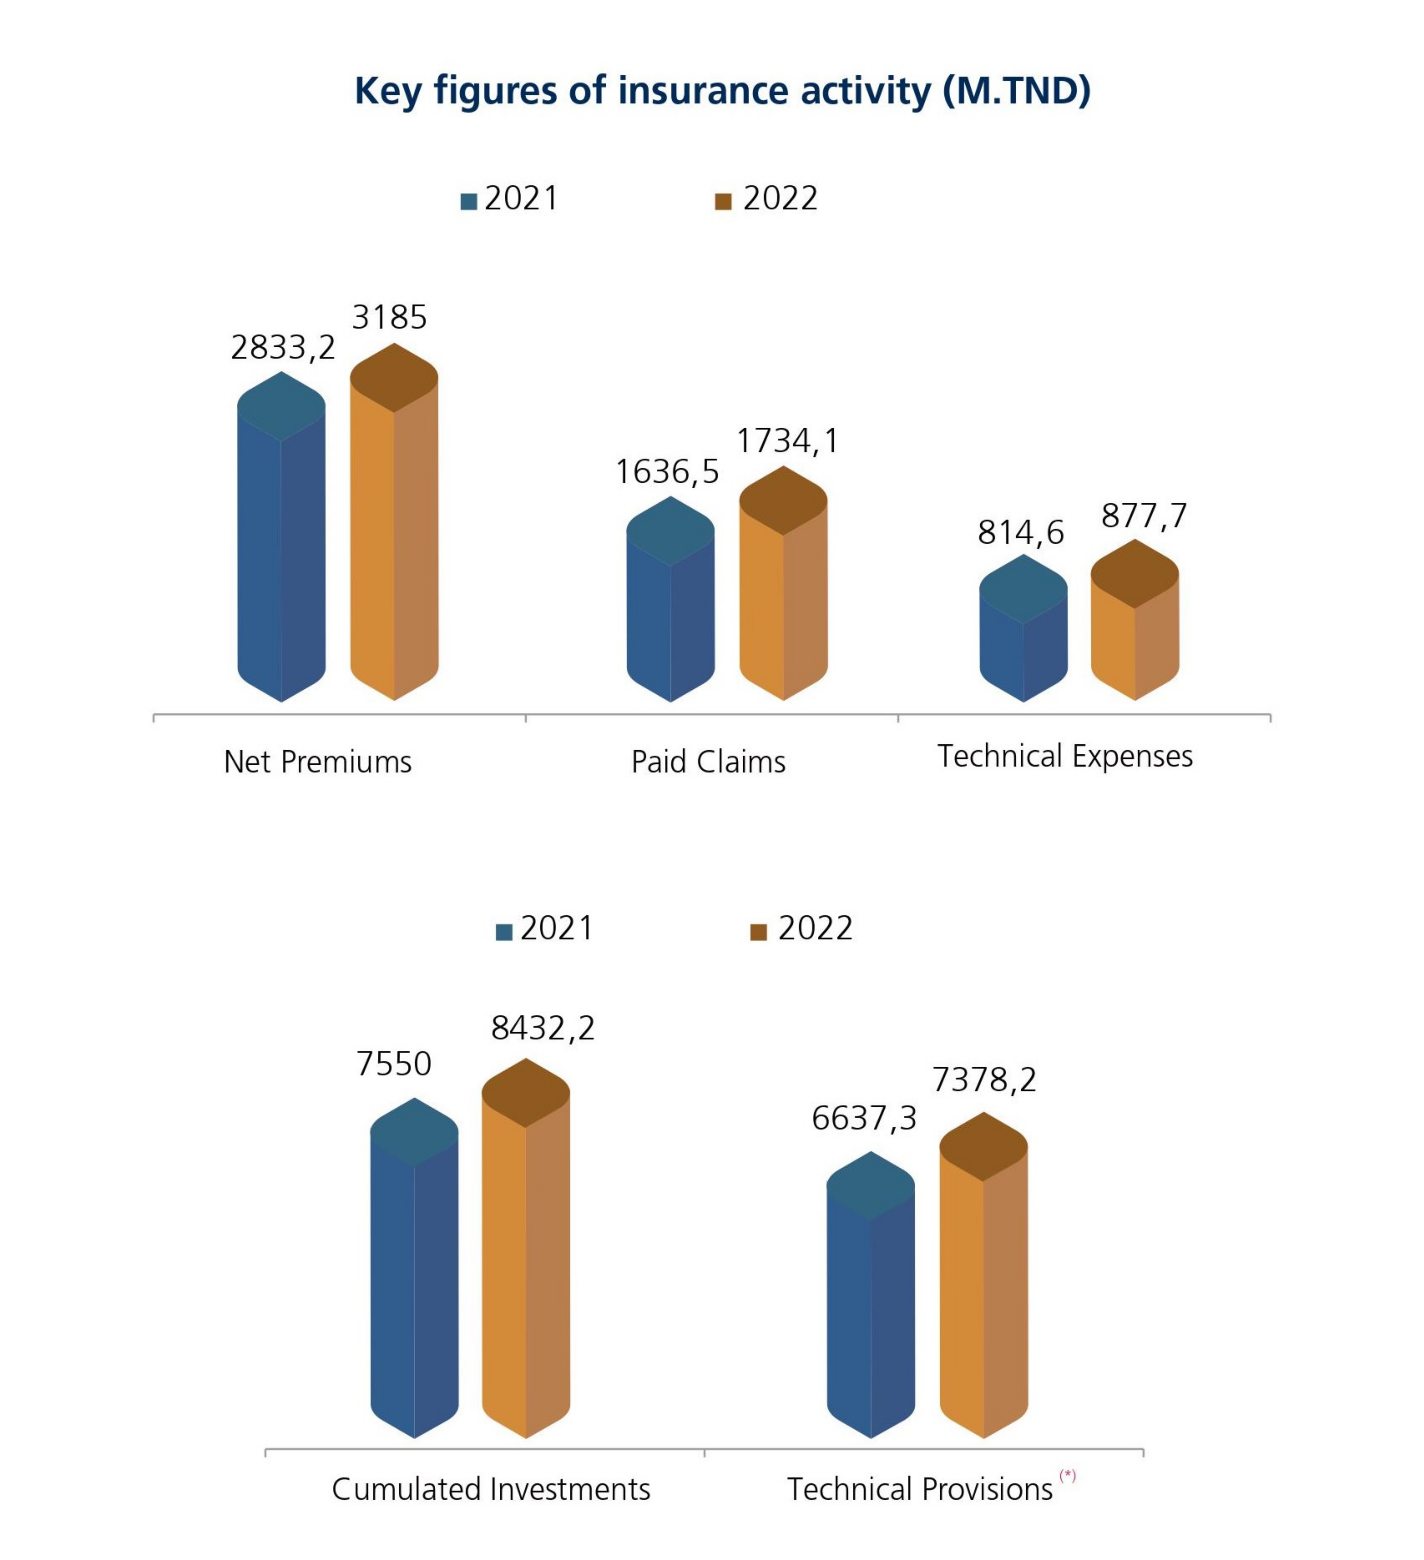

In [11]:
parse_doc(
    "/kaggle/input/tables-and-plots-for-testing/bar_plot_cga.jpg",
    "Convert chart to table."
)

The model couldn't convert the plot into a table, possibly because it wasn't trained on similar chart types. Let's try a different chart.

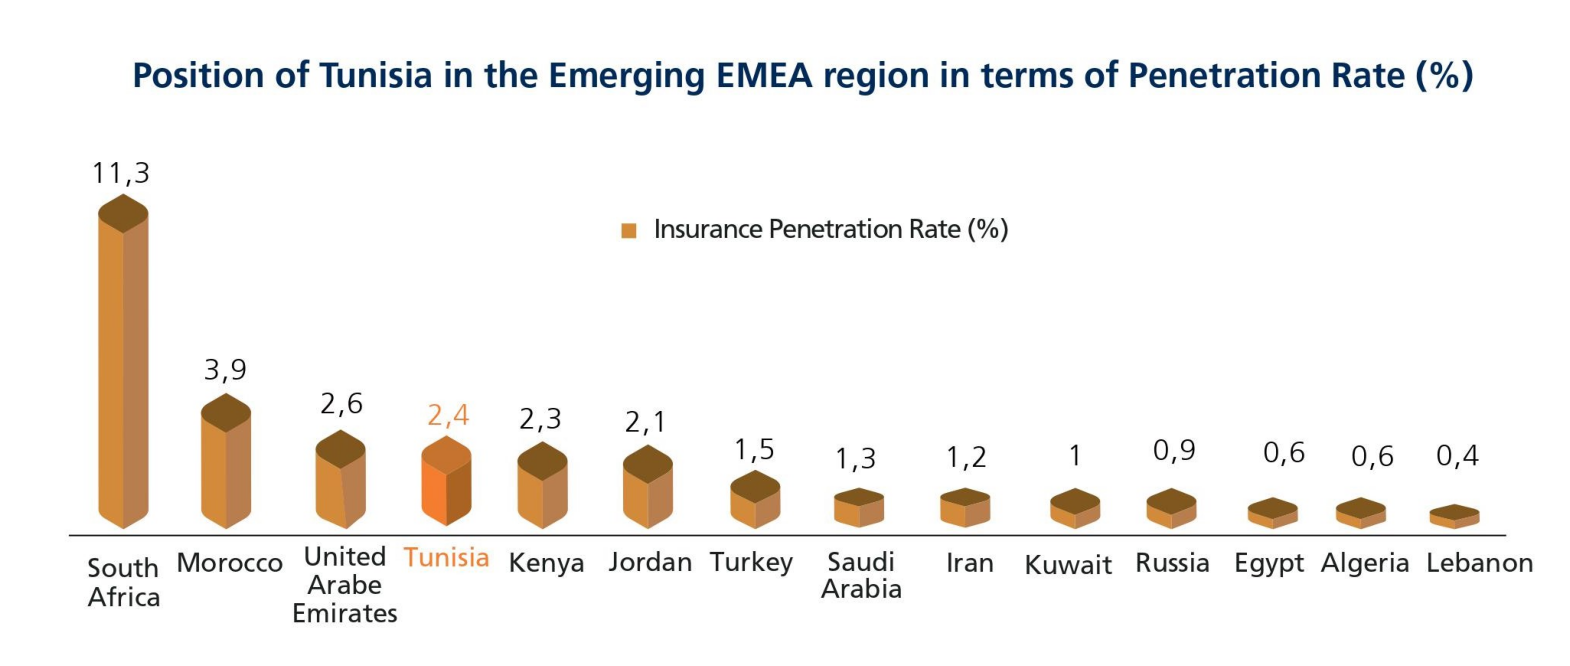

In [12]:
parse_doc(
    "/kaggle/input/tables-and-plots-for-testing/cga_2022_bar_plot_1.jpg",
    "Convert chart to table."
)

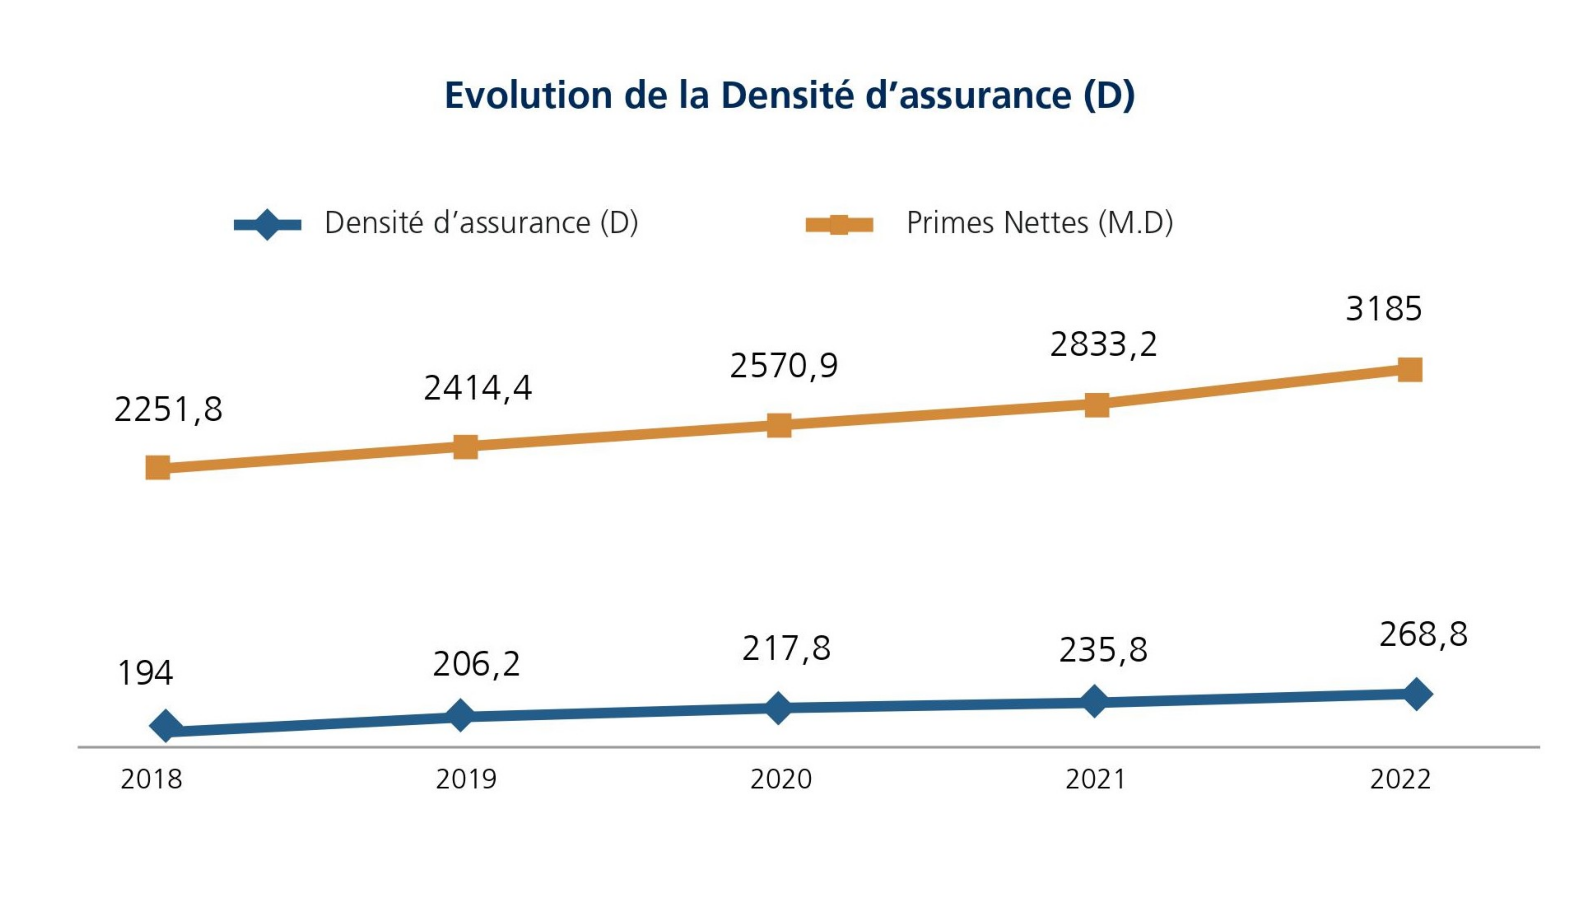

In [13]:
parse_doc(
    "/kaggle/input/tables-and-plots-for-testing/line_plot_cga.jpg",
    "Convert chart to table."
)

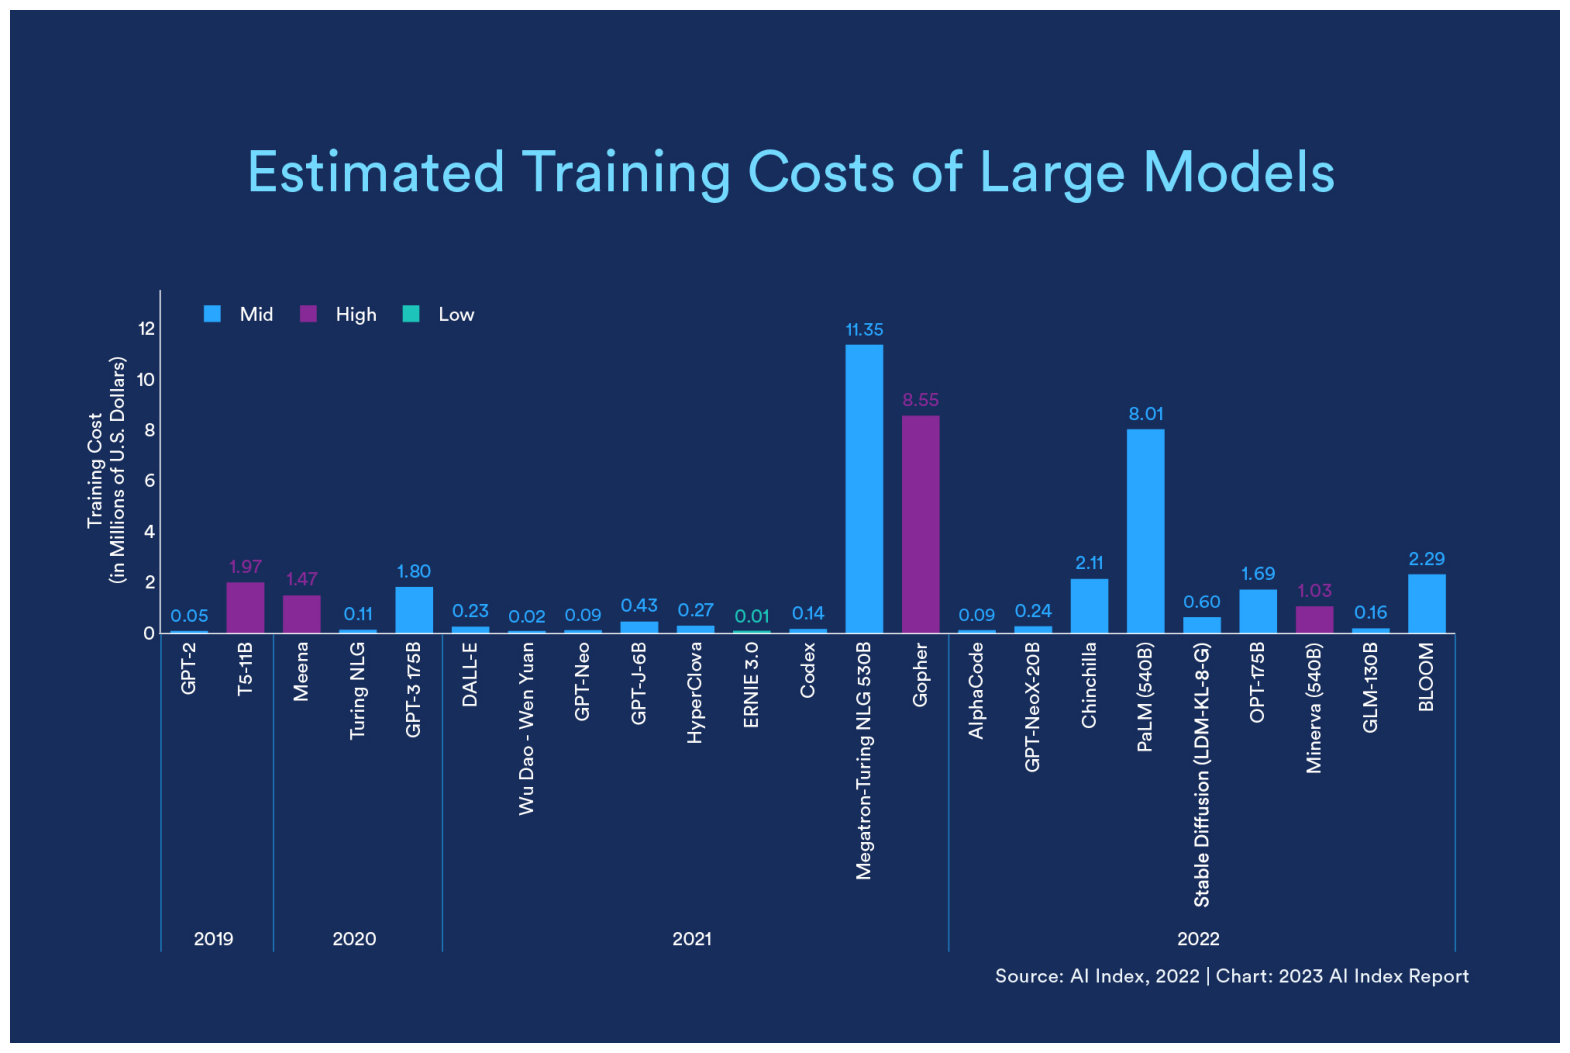

In [14]:
parse_doc(
    "/kaggle/input/tables-and-plots-for-testing/AIIndex_2023_StateofAI_Blog_2.jpg",
    "Convert chart to table."
)

## **5. Conclusion**   <a class="anchor"  id="chapter5"></a>

<div style="background-color: red; color: white; padding: 10px;">
<strong>Smoldocling performs well in text extraction and header identification. However, it struggles with tables that have slightly unusual structures and fails to recognize the content of the given chart images.</strong>
</di>